<a href="https://colab.research.google.com/github/20522182/Basic_Machine_Learning/blob/main/20522182_BaiThucHanh3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# Tạo DL huấn luyện
import numpy as np
# Dùng thuộc tính Petal Width ở cột thứ 3 = slice data
X = iris["data"][:, 3:]
# chuyển về nhị phân từ nhãn
y = (iris["target"] == 2).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
# Tạo DL dự đoán: sinh ngẫu nhiên  ptu tương ứng với Petal Width trong khoảng 0-3cm 
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

In [ ]:
iris['data'].shape

(150, 4)

In [ ]:
# Thêm gtri bias_term vào vector X ban đầu
import numpy as np
#tạo vector (X.shape[0],1)
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

In [ ]:
# hàm sigmoid = 1/(1+e^-x) e^-x: vector (150,1)
def sigmoid(z):
    sig = 1/(1 + np.exp(-z)) # tính trên toàn bộ datasets
    return sig

# tổng sai lệch = hàm loss = -1/m tổng( ylogy^ + (1-y)log(1-y^)) m: số điểm DL 
# y: vector DL =>np.
def compute_loss(y_true, y_hat):
  return -np.mean(y_true * np.log(y_hat) + (1 - y_true) * np.log(1 - y_hat))

# Tính gitri vector gradient descent:  1/m X^T(y-y)
def compute_gradients(X, y_true, y_hat):
  difference = y_hat - y_true
  gradients_w = np.dot(X.T, difference) # Tích vô hướng hai vector 
  gradients_w = gradients_w / y_true.size #(m: số điểm DL)
  return gradients_w

def initilizer(X):
  weights = np.zeros((X.shape[1], ))
  return weights

#Dùng gradient descent để tìm ra tham số tối ưu
#Mỗi lần lặp để cập nhật trọng số, Tính giá trị hàm mất mát của mỗi lần lặp và đưa vào listloss
def fit(X, y, alpha = 0.01, iter = 100):
# khởi tạo tham số
  w0 = initilizer(X)
  w = w0
  listloss = []
  for i in range (0, iter):
    y_hat = sigmoid(np.dot(X, w.T))
    dw = compute_gradients (X, y, y_hat)
    listloss.append(compute_loss(y, y_hat))
    w = w- alpha*dw
  return w, listloss


In [ ]:
#inner loop
def predict(X_new,w):
  y_prob = sigmoid(np.dot(X_new, w.T))
  y_pred = []
  y_pred= [int(k>=0.5) for k in y_prob]
  
  #for i in y_prob:
  #  if i >= 0.5: 
  #   y_pred.append(1)
  #else:
  #  y_pred.append(0)
  return np.array(y_pred), np.array(y_prob)
 

In [ ]:
#----------------- Bài 1 -------------------------
#Huấn luyện mô hình với siêu tham số alpha = 0.1 và iter = 100.
w, listloss = fit(X, y ,alpha = 0.1, iter = 100)

In [ ]:
#----------------- Bài 2 ------------------------
X_train = X[1:100]
y_train= y[1:100]

X_train_pred, X_train_prob= predict(X_train,w)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,X_train_pred)

0.9797979797979798

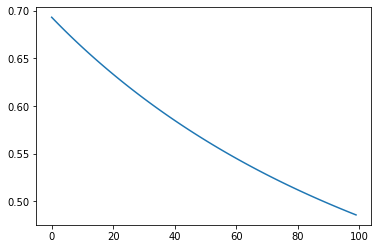

In [ ]:
#----------------- Bài 3-------------------------
import seaborn as sns
sns.lineplot(data = listloss)

In [ ]:
#---------------------- Bài 4 ---------------------
intercept = np.ones((X_new.shape[0], 1))
X_new = np.concatenate((intercept, X_new ),axis = 1)
X_new_pred, X_new_prob= predict(X_new,w)

In [ ]:
#---------------------- Bài 5 ---------------------
#Dự đoán bài 2 = lgr
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X, y)
y_pred_2 = clf.predict(X_train)
accuracy_score(y_pred_2, X_train_pred)

1.0

In [ ]:
#Dự đoán bài 2 = lgr
y_pred_4 = clf.predict(X_new)
accuracy_score(y_pred_4, X_new_pred)

0.987